In [14]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [11]:
DATASET_PATH = os.path.join("datasets", "twitter")
csv_path = os.path.join(DATASET_PATH, "tweets.csv")
tweets = pd.read_csv(csv_path)
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [12]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)


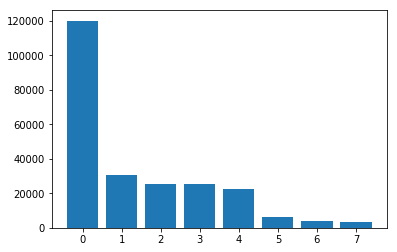

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [13]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

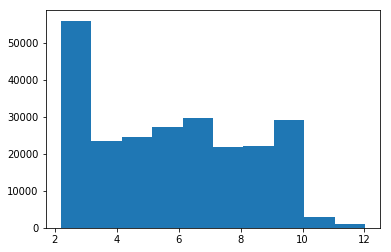

In [15]:
tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()